## Import dependecies

In [1]:
import pandas as pd
import os
import requests 
from bs4 import BeautifulSoup as bs
import nltk

# Text extraction

In [2]:
cases_df = pd.DataFrame([
    {'name': 'MARBURY v. MADISON', 'year': 1803, 'url': "https://caselaw.findlaw.com/us-supreme-court/5/137.html"},
    {'name': 'GIBBONS v. OGDEN', 'year': 1824, 'url': "https://caselaw.findlaw.com/us-supreme-court/22/1.html"},
    {'name': 'WORCESTER v. STATE OF GA.', 'year': 1832, 'url': "https://caselaw.findlaw.com/us-supreme-court/31/515.html"},
    {'name': 'DRED SCOTT v. SANDFORD', 'year': 1856, 'url': "https://caselaw.findlaw.com/us-supreme-court/60/393.html"},
    {'name': 'MUNN v. STATE OF ILLINOIS', 'year': 1876, 'url': 'https://caselaw.findlaw.com/us-supreme-court/94/113.html'},
    {'name': 'LOCHNER v. PEOPLE OF STATE OF NEW YORK', 'year': 1905, 'url': "https://caselaw.findlaw.com/us-supreme-court/198/45.html"},
    {'name': 'ABRAMS v. U S', 'year': 1919, 'url': "https://caselaw.findlaw.com/us-supreme-court/250/616.html"},
    {'name': 'COM. OF MASSACHUSETTS v. MELLON', 'year': 1923, 'url': "https://caselaw.findlaw.com/us-supreme-court/262/447.html"},
    {'name': 'BROWN v. BOARD OF EDUCATION', 'year': 1954, 'url': "https://caselaw.findlaw.com/us-supreme-court/347/483.html"},
    {'name': 'BUCK v. BELL(1927)', 'year': 1927, 'url': "https://caselaw.findlaw.com/us-supreme-court/274/200.html"},
    {'name': 'CHARLES RIVER BRIDGE v. WARREN BRIDGE', 'year': 1837, 'url': "https://caselaw.findlaw.com/us-supreme-court/36/420.html"},
    {'name': 'NEAR v.MINNESOTA', 'year': 1931, 'url': "https://caselaw.findlaw.com/us-supreme-court/283/697.html"},
    {'name': 'WICKARD v. FILBURN', 'year': 1942, 'url': "https://caselaw.findlaw.com/us-supreme-court/317/111.html"},
    {'name': 'MAPP v. OHIO', 'year': 1961, 'url': "https://caselaw.findlaw.com/us-supreme-court/367/643.html"},
    {'name': 'ENGEL v. VITALE', 'year': 1962, 'url': "https://caselaw.findlaw.com/us-supreme-court/370/421.html"},
    {'name': 'GIDEON v. WAINWRIGHT', 'year': 1963, 'url': "https://caselaw.findlaw.com/us-supreme-court/372/335.html"},
    {'name': 'REYNOLDS v. SIMS', 'year': 1964, 'url': "https://caselaw.findlaw.com/us-supreme-court/377/533.html"},
    {'name': 'ATLANTA MOTEL v. UNITED STATES', 'year': 1964, 'url': "https://caselaw.findlaw.com/us-supreme-court/379/241.html"},
    {'name': 'NEW YORK TIMES CO. v. SULLIVAN', 'year': 1964, 'url': "https://caselaw.findlaw.com/us-supreme-court/376/254.html"},
    {'name': 'MIRANDA v. ARIZONA', 'year': 1966, 'url': "https://caselaw.findlaw.com/us-supreme-court/384/436.html"},
    {'name': 'LOVING v. VIRGINIA', 'year': 1967, 'url': "https://caselaw.findlaw.com/us-supreme-court/388/1.html"},
    {'name': 'TERRY v. OHIO', 'year': 1968, 'url': "https://caselaw.findlaw.com/us-supreme-court/392/1.html"},
    {'name': 'BRANDENBURG v. OHIO', 'year': 1969, 'url': "https://caselaw.findlaw.com/us-supreme-court/395/444.html"},
    {'name': 'PHILLIPS v. MARTIN MARIETTA CORP.', 'year': 1971, 'url': "https://caselaw.findlaw.com/us-supreme-court/400/542.html"},
    {'name': 'WISCONSIN v. YODER', 'year': 1972, 'url': "https://caselaw.findlaw.com/us-supreme-court/406/205.html"},
    {'name': 'ROE v. WADE', 'year': 1973, 'url': "https://caselaw.findlaw.com/us-supreme-court/410/113.html"},
    {'name': 'SAN ANTONIO SCHOOL DISTRICT v. RODRIGUEZ', 'year': 1973, 'url': "https://caselaw.findlaw.com/us-supreme-court/411/1.html"},
    {'name': 'UNITED STATES v. NIXON', 'year': 1974, 'url': "https://caselaw.findlaw.com/us-supreme-court/418/683.html"},
    {'name': 'OCONNOR v. DONALDSON', 'year': 1975, 'url': "https://caselaw.findlaw.com/us-supreme-court/422/563.html"},
    {'name': 'BUCKLEY v. VALEO', 'year': 1976, 'url': "https://caselaw.findlaw.com/us-supreme-court/424/1.html"},
    {'name': 'FIRST NATIONAL BANK OF BOSTON v. BELLOTTI', 'year': 1978, 'url': "https://caselaw.findlaw.com/us-supreme-court/435/765.html"},
    {'name': 'UNIVERSITY OF CALIFORNIA REGENTS v. BAKKE', 'year': 1978, 'url': "https://caselaw.findlaw.com/us-supreme-court/438/265.html"},
    {'name': 'STRICKLAND v. WASHINGTON', 'year': 1984, 'url': "https://caselaw.findlaw.com/us-supreme-court/466/668.html"},
    {'name': 'TEXAS v. JOHNSON', 'year': 1989, 'url': "https://caselaw.findlaw.com/us-supreme-court/491/397.html"},
    {'name': 'MICHAEL H. v. GERALD D.', 'year': 1989, 'url': "https://caselaw.findlaw.com/us-supreme-court/491/110.html"},
    {'name': 'CRUZAN v. DIRECTOR, MDH', 'year': 1990, 'url': "https://caselaw.findlaw.com/us-supreme-court/497/261.html"},
    {'name': 'LAWRENCE V. TEXAS', 'year': 2003, 'url': "https://caselaw.findlaw.com/us-supreme-court/539/558.html"},
    {'name': 'GEORGIA v. RANDOLPH', 'year': 2006, 'url': "https://caselaw.findlaw.com/us-supreme-court/547/103.html"},
    {'name': 'MASSACHUSETTS ET AL. v. ENVIRONMENTAL PROTECTION AGENCY ET AL.', 'year': 2007, 'url': "https://caselaw.findlaw.com/us-supreme-court/549/497.html"},
    {'name': 'DISTRICT OF COLUMBIA ET AL. v. HELLER', 'year': 2008, 'url': "https://caselaw.findlaw.com/us-supreme-court/554/570.html"},
    {'name': 'CITIZENS UNITED v. FEDERAL ELECTION COMMISSION', 'year': 2010, 'url': "https://caselaw.findlaw.com/us-supreme-court/08-205.html"},
    {'name': 'NATIONAL FEDERATION OF INDEPENDENT BUSINESS ET AL. v. SEBELIUS, SECRETARY OF HEALTH AND HUMAN SERVICES, ET AL.', 'year': 2012, 'url': "https://caselaw.findlaw.com/us-supreme-court/11-393.html"},
    {'name': 'OBERGEFELL ET AL. v. HODGES, DIRECTOR, OHIO DEPARTMENT OF HEALTH, ET AL.', 'year': 2015, 'url': "https://caselaw.findlaw.com/us-supreme-court/14-556.html"},
    {'name': 'PLESSY v. FERGUSON', 'year': 1896, 'url': "https://caselaw.findlaw.com/us-supreme-court/163/537.html"},
    {'name': 'CHEVRON US A. v. NATURAL RES. DEF. COUNCIL', 'year': 1984, 'url': "https://caselaw.findlaw.com/us-supreme-court/467/837.html"}
])

#get csv of the dataframe

cases_df.to_csv('cases_name_year_url.csv', index=False)
cases_df



,name,year,url
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...


In [3]:
#print length of the df
len(cases_df)

45

In [4]:
#create a list of all the neccesary URLs

urls = ["https://caselaw.findlaw.com/us-supreme-court/5/137.html",
       "https://caselaw.findlaw.com/us-supreme-court/22/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/31/515.html",
       "https://caselaw.findlaw.com/us-supreme-court/60/393.html",
       "https://caselaw.findlaw.com/us-supreme-court/94/113.html", 
       "https://caselaw.findlaw.com/us-supreme-court/198/45.html",
       "https://caselaw.findlaw.com/us-supreme-court/250/616.html",
       "https://caselaw.findlaw.com/us-supreme-court/262/447.html",
       "https://caselaw.findlaw.com/us-supreme-court/347/483.html",
       "https://caselaw.findlaw.com/us-supreme-court/274/200.html",
       "https://caselaw.findlaw.com/us-supreme-court/36/420.html",
       "https://caselaw.findlaw.com/us-supreme-court/283/697.html",
       "https://caselaw.findlaw.com/us-supreme-court/317/111.html",
       "https://caselaw.findlaw.com/us-supreme-court/367/643.html",
       "https://caselaw.findlaw.com/us-supreme-court/370/421.html",
       "https://caselaw.findlaw.com/us-supreme-court/372/335.html",
       "https://caselaw.findlaw.com/us-supreme-court/377/533.html",
       "https://caselaw.findlaw.com/us-supreme-court/379/241.html",
       "https://caselaw.findlaw.com/us-supreme-court/376/254.html",
       "https://caselaw.findlaw.com/us-supreme-court/384/436.html",
       "https://caselaw.findlaw.com/us-supreme-court/388/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/392/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/395/444.html",
       "https://caselaw.findlaw.com/us-supreme-court/400/542.html",
       "https://caselaw.findlaw.com/us-supreme-court/406/205.html",
       "https://caselaw.findlaw.com/us-supreme-court/410/113.html",
       "https://caselaw.findlaw.com/us-supreme-court/411/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/418/683.html",
       "https://caselaw.findlaw.com/us-supreme-court/422/563.html",
       "https://caselaw.findlaw.com/us-supreme-court/424/1.html",
       "https://caselaw.findlaw.com/us-supreme-court/435/765.html",
       "https://caselaw.findlaw.com/us-supreme-court/438/265.html",
       "https://caselaw.findlaw.com/us-supreme-court/466/668.html",
       "https://caselaw.findlaw.com/us-supreme-court/491/397.html",
       "https://caselaw.findlaw.com/us-supreme-court/491/110.html",
       "https://caselaw.findlaw.com/us-supreme-court/497/261.html",
       "https://caselaw.findlaw.com/us-supreme-court/547/103.html",
       "https://caselaw.findlaw.com/us-supreme-court/539/558.html",
       "https://caselaw.findlaw.com/us-supreme-court/549/497.html",
       "https://caselaw.findlaw.com/us-supreme-court/554/570.html",
       "https://caselaw.findlaw.com/us-supreme-court/08-205.html",
       "https://caselaw.findlaw.com/us-supreme-court/11-393.html",
       "https://caselaw.findlaw.com/us-supreme-court/14-556.html",
        "https://caselaw.findlaw.com/us-supreme-court/163/537.html",
       "https://caselaw.findlaw.com/us-supreme-court/467/837.html"]
#print length to see if it matches the DF
len(urls)

45

In [5]:
#loop over urls to scrape the texts and append to our empty list

texts=[]
list1= []
list2 = []
empty_dict={}
for url in urls:
    response = requests.get(url)
    soup = bs(response.text,'html.parser')
    results = soup.find_all("div", class_="caselawcontent searchable-content")[0].get_text() 
    list1.append(url)
    list2.append(results)
    

In [6]:
#create a new df of the scraped text

df2 = {'url':list1, 'text':list2}
df2 = pd.DataFrame(df2)
df2

,url,text
0,https://caselaw.findlaw.com/us-supreme-court/5...,\n\nUnited States Supreme Court\nMARBURY v. MA...
1,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nGIBBONS v. OG...
2,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nWORCESTER v. ...
3,https://caselaw.findlaw.com/us-supreme-court/6...,\n\nUnited States Supreme Court\nDRED SCOTT v....
4,https://caselaw.findlaw.com/us-supreme-court/9...,\n\nUnited States Supreme Court\nMUNN v. STATE...
5,https://caselaw.findlaw.com/us-supreme-court/1...,\n\nUnited States Supreme Court\nLOCHNER v. PE...
6,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nABRAMS v. U S...
7,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nCOM. OF MASSA...
8,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nBROWN v. BOAR...
9,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nBUCK v. BELL(...


In [7]:
#merge the two dataframes together

cases_df=cases_df.merge(df2, on='url')
cases_df

,name,year,url,text
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,\n\nUnited States Supreme Court\nMARBURY v. MA...
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nGIBBONS v. OG...
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nWORCESTER v. ...
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,\n\nUnited States Supreme Court\nDRED SCOTT v....
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,\n\nUnited States Supreme Court\nMUNN v. STATE...
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,\n\nUnited States Supreme Court\nLOCHNER v. PE...
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nABRAMS v. U S...
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nCOM. OF MASSA...
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,\n\nUnited States Supreme Court\nBROWN v. BOAR...
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,\n\nUnited States Supreme Court\nBUCK v. BELL(...


In [8]:
cases_df.to_csv("final_data.csv")

# Text Preprocessing

In [9]:
#remove \n
cases_df= cases_df.replace('\n',' ', regex=True)
cases_df

,name,year,url,text
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,United States Supreme Court MARBURY v. MADIS...
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court GIBBONS v. OGDEN...
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,United States Supreme Court WORCESTER v. STA...
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,United States Supreme Court DRED SCOTT v. SA...
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,United States Supreme Court MUNN v. STATE OF...
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,United States Supreme Court LOCHNER v. PEOPL...
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court ABRAMS v. U S(19...
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court COM. OF MASSACHU...
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,United States Supreme Court BROWN v. BOARD O...
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,United States Supreme Court BUCK v. BELL(192...


In [10]:
#lowercase
cases_df['text'] = cases_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
cases_df['text'][3]

'united states supreme court dred scott v. sandford(1856) no. 38 argued: decided: december 1, 1856 [60 u.s. 393, 396] this case was brought up, by writ of error, from the circuit court of the united states for the district of missouri. it was an action of trespass vi et armis instituted in the circuit court by scott against sandford. prior to the institution of the present suit, an action was brought by scott for his freedom in the circuit court of st. louis county, (state court,) where there was a verdict and judgment in his favor. on a writ of error to the supreme court of the state, the judgment below was reversed, and the case remanded to the circuit court, where it was continued to await the decision of the case now in question. the declaration of scott contained three counts: one, that sandford had assaulted the plaintiff; one, that he had assaulted harriet scott, his wife; and one, that he had assaulted eliza scott and lizzie scott, his children. sandford appeared, and filed the

In [11]:
#remove punctuation
cases_df['text'] = cases_df['text'].str.replace('[^\w\s]','')
cases_df['text']

0     united states supreme court marbury v madison1...
1     united states supreme court gibbons v ogden182...
2     united states supreme court worcester v state ...
3     united states supreme court dred scott v sandf...
4     united states supreme court munn v state of il...
5     united states supreme court lochner v people o...
6     united states supreme court abrams v u s1919 n...
7     united states supreme court com of massachuset...
8     united states supreme court brown v board of e...
9     united states supreme court buck v bell1927 no...
10    united states supreme court proprietors of cha...
11    united states supreme court near v state of mi...
12    united states supreme court wickard v filburn1...
13    united states supreme court mapp v ohio1961 no...
14    united states supreme court engel v vitale1962...
15    united states supreme court gideon v wainwrigh...
16    united states supreme court reynolds v sims196...
17    united states supreme court atlanta motel 

In [12]:
#remove numbers
cases_df['text'] = cases_df['text'].str.replace('\d+', '')
cases_df['text']

0     united states supreme court marbury v madison ...
1     united states supreme court gibbons v ogden no...
2     united states supreme court worcester v state ...
3     united states supreme court dred scott v sandf...
4     united states supreme court munn v state of il...
5     united states supreme court lochner v people o...
6     united states supreme court abrams v u s no  a...
7     united states supreme court com of massachuset...
8     united states supreme court brown v board of e...
9     united states supreme court buck v bell no  ar...
10    united states supreme court proprietors of cha...
11    united states supreme court near v state of mi...
12    united states supreme court wickard v filburn ...
13    united states supreme court mapp v ohio no  ar...
14    united states supreme court engel v vitale no ...
15    united states supreme court gideon v wainwrigh...
16    united states supreme court reynolds v sims no...
17    united states supreme court atlanta motel 

In [13]:
#remove words if length less than 1
cases_df['text'] = cases_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
cases_df['text']

0     united states supreme court marbury madison ar...
1     united states supreme court gibbons ogden no a...
2     united states supreme court worcester state of...
3     united states supreme court dred scott sandfor...
4     united states supreme court munn state of illi...
5     united states supreme court lochner people of ...
6     united states supreme court abrams no argued d...
7     united states supreme court com of massachuset...
8     united states supreme court brown board of edu...
9     united states supreme court buck bell no argue...
10    united states supreme court proprietors of cha...
11    united states supreme court near state of minn...
12    united states supreme court wickard filburn no...
13    united states supreme court mapp ohio no argue...
14    united states supreme court engel vitale no ar...
15    united states supreme court gideon wainwright ...
16    united states supreme court reynolds sims no a...
17    united states supreme court atlanta motel 

### Lemmatization 

In [14]:
#lemmatization and taking root of verbs only

#!pip install -U textblob
import nltk
#nltk.download('wordnet')
from textblob import Word

cases_df['text'] = cases_df['text'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))

cases_df['text']

0     unite state supreme court marbury madison argu...
1     unite state supreme court gibbons ogden no arg...
2     unite state supreme court worcester state of g...
3     unite state supreme court dred scott sandford ...
4     unite state supreme court munn state of illino...
5     unite state supreme court lochner people of st...
6     unite state supreme court abrams no argue deci...
7     unite state supreme court com of massachusetts...
8     unite state supreme court brown board of educa...
9     unite state supreme court buck bell no argue a...
10    unite state supreme court proprietors of charl...
11    unite state supreme court near state of minnes...
12    unite state supreme court wickard filburn no a...
13    unite state supreme court mapp ohio no argue m...
14    unite state supreme court engel vitale no argu...
15    unite state supreme court gideon wainwright no...
16    unite state supreme court reynolds sims no arg...
17    unite state supreme court atlanta motel un

In [15]:
cases_df['text'][0]

'unite state supreme court marbury madison argue decide february at the december term william marbury dennis ramsay robert townsend hooe and william harper by their counsel us severally move the court for rule to jam madison secretary of state of the unite state to show cause why mandamus should not issue command him to cause to be deliver to them respectively their several commission as justices of the peace in the district of columbia this motion be support by affidavits of the follow facts that notice of this motion have be give to mr madison that mr adams the late president of the unite state nominate the applicants to the senate for their advice and consent to be appoint justices of the peace of the district of columbia that the senate advise and consent to the appointments that commission in due form be sign by the say president appoint them justices and that the seal of the unite state be in due form affix to the say commission by the secretary of state that the applicants have 

### Stopwords removal 

In [16]:
#stopwords

#!pip install nltk
#nltk.download()

from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')

cases_df['text'] = cases_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

cases_df['text'][0]

'unite state supreme court marbury madison argue decide february december term william marbury dennis ramsay robert townsend hooe william harper counsel us severally move court rule jam madison secretary state unite state show cause mandamus issue command cause deliver respectively several commission justices peace district columbia motion support affidavits follow facts notice motion give mr madison mr adams late president unite state nominate applicants senate advice consent appoint justices peace district columbia senate advise consent appointments commission due form sign say president appoint justices seal unite state due form affix say commission secretary state applicants request mr madison deliver say commission comply request say commission withhold applicants make application mr madison secretary state unite state office information whether commission sign seal aforesaid explicit satisfactory information give answer inquiry either secretary state officer department state appl

In [17]:
cases_df['text'][0]

'unite state supreme court marbury madison argue decide february december term william marbury dennis ramsay robert townsend hooe william harper counsel us severally move court rule jam madison secretary state unite state show cause mandamus issue command cause deliver respectively several commission justices peace district columbia motion support affidavits follow facts notice motion give mr madison mr adams late president unite state nominate applicants senate advice consent appoint justices peace district columbia senate advise consent appointments commission due form sign say president appoint justices seal unite state due form affix say commission secretary state applicants request mr madison deliver say commission comply request say commission withhold applicants make application mr madison secretary state unite state office information whether commission sign seal aforesaid explicit satisfactory information give answer inquiry either secretary state officer department state appl

In [18]:
#set variable for column
text = cases_df['text']

### Tokenization 

In [19]:
#tokenization
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = text.apply(word_tokenize)
text_tokens


0     [unite, state, supreme, court, marbury, madiso...
1     [unite, state, supreme, court, gibbons, ogden,...
2     [unite, state, supreme, court, worcester, stat...
3     [unite, state, supreme, court, dred, scott, sa...
4     [unite, state, supreme, court, munn, state, il...
5     [unite, state, supreme, court, lochner, people...
6     [unite, state, supreme, court, abrams, argue, ...
7     [unite, state, supreme, court, com, massachuse...
8     [unite, state, supreme, court, brown, board, e...
9     [unite, state, supreme, court, buck, bell, arg...
10    [unite, state, supreme, court, proprietors, ch...
11    [unite, state, supreme, court, near, state, mi...
12    [unite, state, supreme, court, wickard, filbur...
13    [unite, state, supreme, court, mapp, ohio, arg...
14    [unite, state, supreme, court, engel, vitale, ...
15    [unite, state, supreme, court, gideon, wainwri...
16    [unite, state, supreme, court, reynolds, sims,...
17    [unite, state, supreme, court, atlanta, mo

In [20]:
#remove brackets 
text_tokens_df = text_tokens.apply(lambda x: ",".join(x) if isinstance(x, list) else x)
text_tokens_df[4]

'unite,state,supreme,court,munn,state,illinois,argue,decide,october,munn,state,illinois,us,error,supreme,court,state,illinois,constitution,illinois,adopt,contain,follow,reference,inspection,grain,storage,thereof,public,warehouse,article,xiiiwarehouses,section,elevators,storehouses,grain,property,store,compensation,whether,property,store,keep,separate,declare,public,warehouse,sect,owner,lessee,manager,every,public,warehouse,situate,town,city,less,one,hundred,thousand,inhabitants,shall,make,weekly,statements,oath,officer,designate,law,keep,post,conspicuous,place,office,warehouse,shall,also,file,copy,public,examination,place,shall,designate,law,statement,shall,correctly,set,forth,amount,grade,every,kind,grain,warehouse,together,property,may,store,therein,warehouse,receipt,issue,time,make,statement,outstanding,therefor,shall,copy,post,warehouse,note,daily,change,may,make,quantity,grade,grain,warehouse,different,grade,grain,ship,separate,lot,shall,us,mix,inferior,superior,grade,without,cons

In [21]:
text_tokens_df = pd.DataFrame(text_tokens_df)

text_tokens_df = text_tokens_df.rename(columns={'text': 'tokens'})
text_tokens_df

,tokens
0,"unite,state,supreme,court,marbury,madison,argu..."
1,"unite,state,supreme,court,gibbons,ogden,argue,..."
2,"unite,state,supreme,court,worcester,state,ga,a..."
3,"unite,state,supreme,court,dred,scott,sandford,..."
4,"unite,state,supreme,court,munn,state,illinois,..."
5,"unite,state,supreme,court,lochner,people,state..."
6,"unite,state,supreme,court,abrams,argue,decide,..."
7,"unite,state,supreme,court,com,massachusetts,me..."
8,"unite,state,supreme,court,brown,board,educatio..."
9,"unite,state,supreme,court,buck,bell,argue,apri..."


### Part-Of-Speech Tagging

In [22]:
#get POS tags with NLTK
pos_tag = text_tokens.apply(nltk.pos_tag)
pos_tag

0     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
1     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
2     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
3     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
4     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
5     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
6     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
7     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
8     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
9     [(unite, JJ), (state, NN), (supreme, JJ), (cou...
10    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
11    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
12    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
13    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
14    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
15    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
16    [(unite, JJ), (state, NN), (supreme, JJ), (cou...
17    [(unite, JJ), (state, NN), (supreme, JJ), 

In [23]:
#find out the meaning of specific tags

#nltk.download('tagsets')
nltk.help.upenn_tagset("JJ")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [24]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [25]:
#convert series to DF
pos_tag_df = pd.Series(pos_tag,
               name="POS_tags")
pos_tag_df.to_frame()

,POS_tags
0,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
1,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
2,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
3,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
4,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
5,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
6,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
7,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
8,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."
9,"[(unite, JJ), (state, NN), (supreme, JJ), (cou..."


In [26]:
#merge the two dataframes together

text_and_tokens = pd.concat([cases_df, text_tokens_df], axis=1)
text_and_tokens

,name,year,url,text,tokens
0,MARBURY v. MADISON,1803,https://caselaw.findlaw.com/us-supreme-court/5...,unite state supreme court marbury madison argu...,"unite,state,supreme,court,marbury,madison,argu..."
1,GIBBONS v. OGDEN,1824,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court gibbons ogden argue ...,"unite,state,supreme,court,gibbons,ogden,argue,..."
2,WORCESTER v. STATE OF GA.,1832,https://caselaw.findlaw.com/us-supreme-court/3...,unite state supreme court worcester state ga a...,"unite,state,supreme,court,worcester,state,ga,a..."
3,DRED SCOTT v. SANDFORD,1856,https://caselaw.findlaw.com/us-supreme-court/6...,unite state supreme court dred scott sandford ...,"unite,state,supreme,court,dred,scott,sandford,..."
4,MUNN v. STATE OF ILLINOIS,1876,https://caselaw.findlaw.com/us-supreme-court/9...,unite state supreme court munn state illinois ...,"unite,state,supreme,court,munn,state,illinois,..."
5,LOCHNER v. PEOPLE OF STATE OF NEW YORK,1905,https://caselaw.findlaw.com/us-supreme-court/1...,unite state supreme court lochner people state...,"unite,state,supreme,court,lochner,people,state..."
6,ABRAMS v. U S,1919,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court abrams argue decide ...,"unite,state,supreme,court,abrams,argue,decide,..."
7,COM. OF MASSACHUSETTS v. MELLON,1923,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court com massachusetts me...,"unite,state,supreme,court,com,massachusetts,me..."
8,BROWN v. BOARD OF EDUCATION,1954,https://caselaw.findlaw.com/us-supreme-court/3...,unite state supreme court brown board educatio...,"unite,state,supreme,court,brown,board,educatio..."
9,BUCK v. BELL(1927),1927,https://caselaw.findlaw.com/us-supreme-court/2...,unite state supreme court buck bell argue apri...,"unite,state,supreme,court,buck,bell,argue,apri..."


### NER-tagging 

In [27]:
#SPACY PERHAPS
#from nltk import ne_chunk

#text_tokens.apply(ne_chunk)

# Exploring the Data

In [28]:
#TF-IDF
from nltk.probability import FreqDist

frequency_dist = text_tokens.apply(nltk.FreqDist)
frequency_dist

0     {'unite': 48, 'state': 89, 'supreme': 18, 'cou...
1     {'unite': 170, 'state': 1198, 'supreme': 20, '...
2     {'unite': 221, 'state': 514, 'supreme': 34, 'c...
3     {'unite': 586, 'state': 1882, 'supreme': 76, '...
4     {'unite': 18, 'state': 133, 'supreme': 11, 'co...
5     {'unite': 8, 'state': 104, 'supreme': 11, 'cou...
6     {'unite': 47, 'state': 47, 'supreme': 2, 'cour...
7     {'unite': 8, 'state': 73, 'supreme': 2, 'court...
8     {'unite': 13, 'state': 40, 'supreme': 4, 'cour...
9     {'unite': 1, 'state': 7, 'supreme': 3, 'court'...
10    {'unite': 86, 'state': 649, 'supreme': 36, 'co...
11    {'unite': 10, 'state': 65, 'supreme': 10, 'cou...
12    {'unite': 38, 'state': 62, 'supreme': 1, 'cour...
13    {'unite': 45, 'state': 185, 'supreme': 14, 'co...
14    {'unite': 10, 'state': 64, 'supreme': 9, 'cour...
15    {'unite': 8, 'state': 70, 'supreme': 8, 'court...
16    {'unite': 36, 'state': 545, 'supreme': 9, 'cou...
17    {'unite': 48, 'state': 186, 'supreme': 4, 

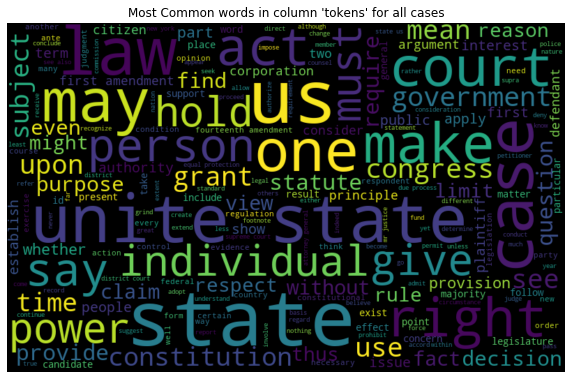

In [101]:
#wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in text_and_tokens['tokens']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column 'tokens' for all cases")
plt.show()

In [ ]:
#Creating Bigram and Trigram Models

# Modeling

In [ ]:
# Create the Dictionary and Corpus needed for Topic Modeling

In [83]:
# Create Dictionary
id2word = corpora.Dictionary(text_tokens)

# Create Corpus
texts = text_tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 4), (11, 4), (12, 1), (13, 5), (14, 3), (15, 1), (16, 1), (17, 1), (18, 91), (19, 3), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 7), (32, 1), (33, 2), (34, 6), (35, 4), (36, 1), (37, 1), (38, 16), (39, 6), (40, 2), (41, 2), (42, 2), (43, 2), (44, 1), (45, 1), (46, 2), (47, 2), (48, 1), (49, 4), (50, 3), (51, 6), (52, 2), (53, 1), (54, 1), (55, 1), (56, 4), (57, 1), (58, 2), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 6), (68, 1), (69, 3), (70, 1), (71, 5), (72, 14), (73, 1), (74, 2), (75, 7), (76, 4), (77, 4), (78, 13), (79, 30), (80, 50), (81, 2), (82, 1), (83, 3), (84, 1), (85, 1), (86, 5), (87, 1), (88, 1), (89, 4), (90, 2), (91, 1), (92, 2), (93, 1), (94, 7), (95, 1), (96, 1), (97, 1), (98, 1), (99, 3), (100, 4), (101, 2), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 11), (108, 9), (109, 3), (

In [84]:
# print first word
id2word[0]


'abilities'

In [85]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abilities', 1),
  ('able', 1),
  ('ably', 1),
  ('abolish', 1),
  ('absolute', 2),
  ('absolutely', 1),
  ('absque', 1),
  ('absurd', 2),
  ('absurdity', 1),
  ('accelerate', 1),
  ('accept', 4),
  ('acceptance', 4),
  ('accident', 1),
  ('accord', 5),
  ('account', 3),
  ('accountable', 1),
  ('accurately', 1),
  ('acquire', 1),
  ('act', 91),
  ('action', 3),
  ('actual', 1),
  ('adams', 2),
  ('addition', 1),
  ('additional', 2),
  ('address', 1),
  ('adhere', 1),
  ('adjudication', 1),
  ('administer', 1),
  ('admit', 1),
  ('advance', 1),
  ('advert', 2),
  ('advice', 7),
  ('advise', 1),
  ('affairs', 2),
  ('affect', 6),
  ('affidavits', 4),
  ('affirm', 1),
  ('affirmative', 1),
  ('affix', 16),
  ('afford', 6),
  ('aforesaid', 2),
  ('afterwards', 2),
  ('agents', 2),
  ('agreeably', 2),
  ('aid', 1),
  ('al', 1),
  ('allege', 2),
  ('allow', 2),
  ('almost', 1),
  ('alone', 4),
  ('already', 3),
  ('also', 6),
  ('alter', 2),
  ('alterable', 1),
  ('alternative', 1),
  ('

In [86]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [87]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.002*"state" + 0.001*"court" + 0.001*"right" + 0.001*"us" + 0.001*"law" + '
  '0.001*"case" + 0.001*"would" + 0.001*"see" + 0.001*"power" + 0.001*"unite"'),
 (1,
  '0.022*"us" + 0.016*"state" + 0.015*"court" + 0.008*"right" + 0.007*"case" + '
  '0.006*"may" + 0.006*"footnote" + 0.005*"law" + 0.005*"amendment" + '
  '0.005*"make"'),
 (2,
  '0.015*"us" + 0.011*"state" + 0.011*"officer" + 0.010*"search" + '
  '0.008*"police" + 0.008*"court" + 0.007*"upon" + 0.007*"prayer" + '
  '0.006*"religious" + 0.006*"unite"'),
 (3,
  '0.017*"state" + 0.013*"us" + 0.011*"court" + 0.010*"health" + 0.010*"hours" '
  '+ 0.010*"power" + 0.010*"labor" + 0.009*"right" + 0.008*"law" + '
  '0.007*"may"'),
 (4,
  '0.037*"state" + 0.015*"court" + 0.011*"unite" + 0.011*"power" + '
  '0.009*"constitution" + 0.009*"right" + 0.008*"case" + 0.008*"us" + '
  '0.007*"congress" + 0.007*"government"'),
 (5,
  '0.004*"us" + 0.003*"state" + 0.002*"court" + 0.002*"case" + 0.002*"right" + '
  '0.002*"interest" + 0.

### Evaluate Model 

In [90]:
# Compute Perplexity
from gensim.models.coherencemodel import CoherenceModel

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_tokens, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.675966656137062

Coherence Score:  0.3693612460886569


In [100]:
# Visualize the topics
#!python -m pip install -U pyLDAvis

from pyLDAvis import gensim
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.108023 -0.090832       1        1  15.927351
18     0.075921  0.087322       2        1  12.649657
15     0.111977 -0.145409       3        1  10.550152
16     0.071267  0.033207       4        1  10.349766
1      0.069269  0.037024       5        1   9.924076
19     0.116841  0.042888       6        1   7.749752
9      0.083382  0.058703       7        1   7.632115
17     0.075449  0.031852       8        1   4.797325
12     0.064166  0.076672       9        1   4.625006
7      0.128567 -0.179700      10        1   4.558813
14     0.047602  0.064779      11        1   3.727945
11     0.060491  0.018905      12        1   2.623608
2      0.039714  0.020270      13        1   2.283178
13     0.022105  0.094415      14        1   1.698926
3     -0.009720 -0.094020      15        1   0.901559
6     -0.171522 -0.013653      16        1   0.000164
5     -0.193430  0.004433      17        1   0.000160
10    -0.206806 -0.016938      18        1   0.000158
0     -0.237965 -0.014486      19        1   0.000147
8     -0.255332 -0.015435      20        1   0.000143, topic_info=     Category          Freq        Term         Total  loglift  logprob
923   Default  10654.000000       state  10654.000000  30.0000  30.0000
1006  Default   6037.000000          us   6037.000000  29.0000  29.0000
252   Default   6579.000000       court   6579.000000  28.0000  28.0000
865   Default   4731.000000       right   4731.000000  27.0000  27.0000
756   Default   3404.000000       power   3404.000000  26.0000  26.0000
...       ...           ...         ...           ...      ...      ...
446   Topic20      0.000292  government   1696.139160  -2.1202  -7.9597
158   Topic20      0.000251      clause    960.012085  -1.7006  -8.1092
466   Topic20      0.000277        hold   1415.136719  -1.9931  -8.0137
1966  Topic20      0.000298    footnote   2078.293945  -2.3019  -7.9382
695   Topic20      0.000265     opinion   1260.712769  -1.9198  -8.0560

[1524 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1061       1  0.014841       ___
1061       2  0.230033       ___
1061       4  0.192931       ___
1061       5  0.066784       ___
1061       8  0.044522       ___
...      ...       ...       ...
19282      2  0.986367      wrtl
16413     14  0.933370        ys
17062      9  0.924715  zablocki
17062     11  0.057795  zablocki
12465     13  0.830559   zuckers

[4850 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 19, 16, 17, 2, 20, 10, 18, 13, 8, 15, 12, 3, 14, 4, 7, 6, 11, 1, 9])

# Building LDA Mallet Model